In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os


In [ ]:
df = pd.read_csv(r'data\Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.5224 - accuracy: 0.7923 - val_loss: 0.4785 - val_accuracy: 0.8119
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7923 - val_loss: 0.4658 - val_accuracy: 0.8119
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7923 - val_loss: 0.4526 - val_accuracy: 0.8119
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7923 - val_loss: 0.4406 - val_accuracy: 0.8119
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7923 - val_loss: 0.4290 - val_accuracy: 0.8119
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7931 - val_loss: 0.4207 - val_accuracy: 0.8169
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8028 - val_loss: 0.4139 - val_accuracy: 0.8225

In [ ]:
y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[0.20941515],
       [0.11162905],
       [0.08412687],
       ...,
       [0.07973164],
       [0.9637364 ],
       [0.06885097]], dtype=float32)

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1,)

In [ ]:
y_pred.shape

(2000,)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.859

In [ ]:
print("Actual")
print("Prediction  \n",confusion_matrix(y_test, y_pred, labels=[1,0]))

Actual
Prediction  
 [[ 172  235]
 [  47 1546]]


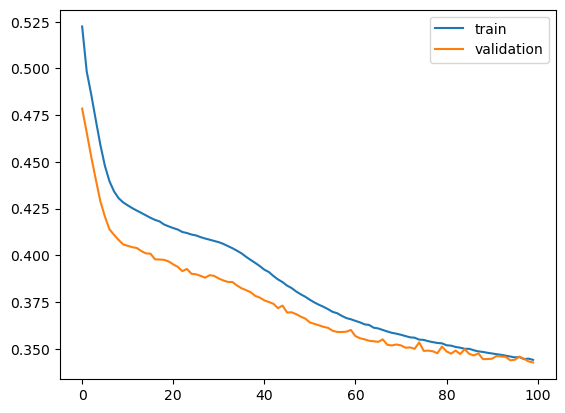

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

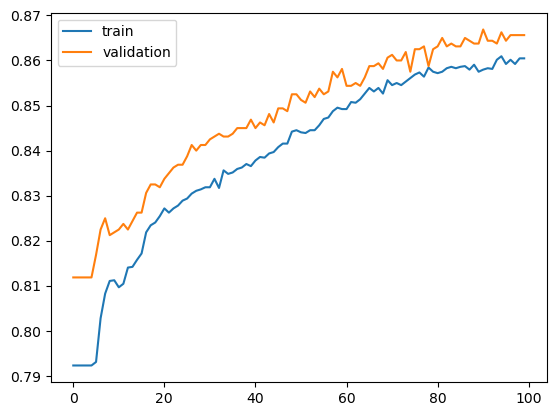

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])